In [1]:
import numpy as np
import matplotlib.pyplot as plt
import apogee.tools.read as apread
import apogee.spec.plot as splot
from tqdm import tqdm
try:
    from sewingmachine import equivalentwidths, linelist

except NameError:
    reload(equivalentwidths)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Re-fitting continuum after sigma clipping...


(0.15623079470219101, 0.019354601913129797)

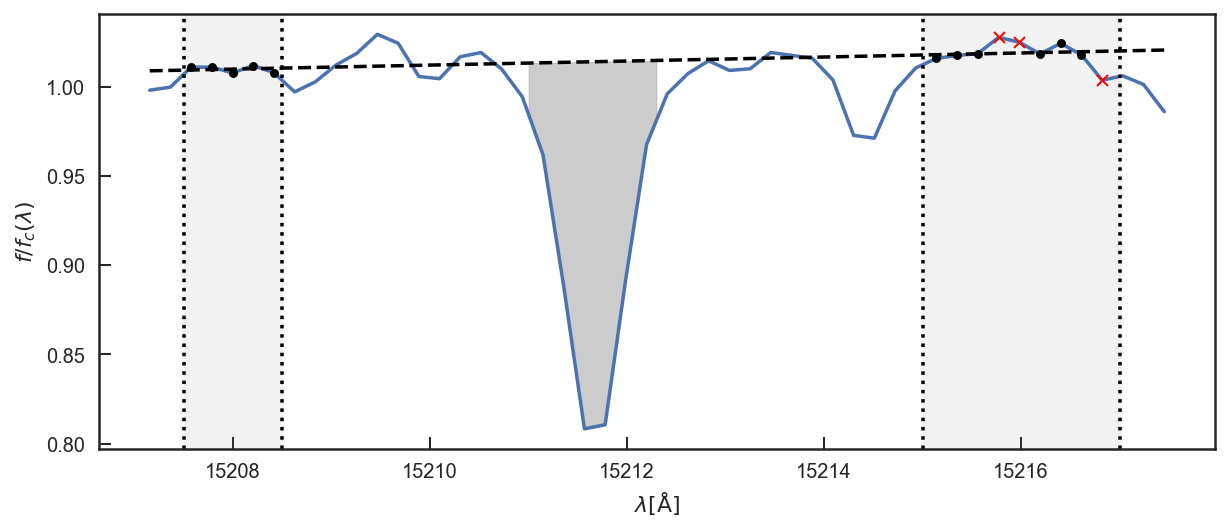

In [2]:
lams= splot.apStarWavegrid()
inds = (lams > 15206) & (lams < 15218)
spec, hdr = apread.aspcapStar(4120, '2M00221738+6957505', ext=1)
errspec, hdr = apread.aspcapStar(4120, '2M00221738+6957505', ext=2)
spectrum = np.dstack([lams,spec,errspec])[0]

fig = plt.figure()
fig.set_size_inches(10,4)
integration = [15211, 15212.3]
windows = [[15207.5,15208.5], [15215,15217]]

equivalentwidths.trapz_ew(spectrum, integration, windows, plot=True, sigma=1., verbose=True, error=True)

In [3]:
%timeit -n 100 equivalentwidths.trapz_ew(spectrum, integration, windows, plot=False, sigma=1, error=True)

100 loops, best of 3: 1.59 ms per loop


In [4]:
lines = linelist.Linelist('linelists/linelist.txt')

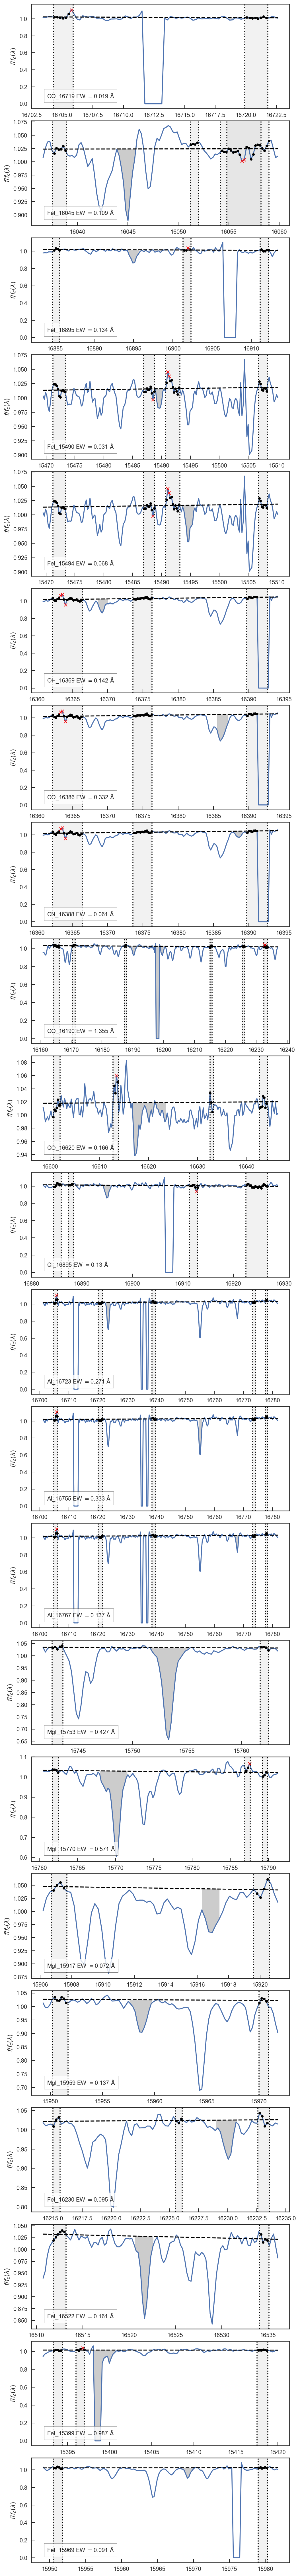

In [5]:
ews, errs, flags = equivalentwidths.measurelinelist(spectrum, lines, sigma = 2, plot=True, return_flags=True, error=True)

In [6]:
print ews
print errs
print flags

[ 0.01874904  0.10850065  0.13411256  0.03063063  0.06752875  0.14188378
  0.33206328  0.06071425  1.35481682  0.16555933  0.12952434  0.27095986
  0.33291334  0.13651847  0.42701866  0.57111331  0.07170446  0.1369376
  0.09464603  0.16105109  0.98677788  0.09102054]
[  2.60777462e-02   2.09607779e-02   3.98450875e-02   1.75392451e-02
   2.13436564e-02   4.45861630e-02   4.89153319e-02   4.96147512e-02
   1.04332730e+02   1.55430998e+01   4.37705000e-02   2.66616658e-02
   2.50712660e-02   2.37265091e+01   2.96139407e-02   2.86756314e-02
   1.58804140e-02   1.96705751e-02   1.95085223e-02   2.51488850e-02
   1.58540593e+02   1.68767808e-02]
[[], [], [], [], [], ['CONTINUUM_BAD_PIXEL'], ['CONTINUUM_BAD_PIXEL'], ['CONTINUUM_BAD_PIXEL'], ['INTEGRATION_BAD_PIXEL'], [], [], [], [], [], [], [], [], [], [], [], ['INTEGRATION_BAD_PIXEL'], []]


Re-fitting continuum after sigma clipping...


(1.3685014180958692, 104.33273042910648, ['INTEGRATION_BAD_PIXEL'])

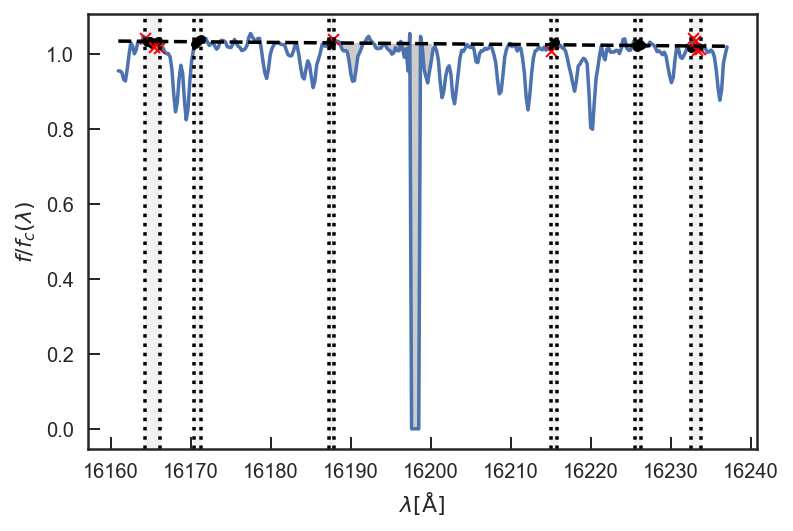

In [7]:
equivalentwidths.trapz_ew(spectrum, lines.integration[8], lines.windows[8], plot=True, sigma=1, verbose=True, return_flags = True, error=True)

In [2]:
allStar = apread.allStar()

In [20]:
specs = np.empty([100,len(lams)])
errspecs = np.empty([100,len(lams)])
for i in tqdm(range(100)):
    specs[i], hdr = apread.aspcapStar(allStar['LOCATION_ID'][i], allStar['APOGEE_ID'][i], ext=1)
    errspecs[i], hdr = apread.aspcapStar(allStar['LOCATION_ID'][i], allStar['APOGEE_ID'][i], ext=2)
    

  0%|          | 0/100 [00:00<?, ?it/s]

  6%|▌         | 6/100 [00:01<00:25,  3.66it/s]

  7%|▋         | 7/100 [00:03<00:59,  1.56it/s]

  8%|▊         | 8/100 [00:04<01:25,  1.08it/s]

  9%|▉         | 9/100 [00:06<01:42,  1.12s/it]

 10%|█         | 10/100 [00:07<01:50,  1.23s/it]

 11%|█         | 11/100 [00:09<01:58,  1.33s/it]

 12%|█▏        | 12/100 [00:10<02:04,  1.41s/it]

 13%|█▎        | 13/100 [00:12<02:08,  1.48s/it]

 14%|█▍        | 14/100 [00:14<02:13,  1.55s/it]

 15%|█▌        | 15/100 [00:15<02:12,  1.56s/it]

 16%|█▌        | 16/100 [00:17<02:11,  1.56s/it]

 17%|█▋        | 17/100 [00:19<02:10,  1.58s/it]

 18%|█▊        | 18/100 [00:20<02:07,  1.56s/it]

 19%|█▉        | 19/100 [00:22<02:16,  1.68s/it]

 20%|██        | 20/100 [00:24<02:13,  1.67s/it]

 21%|██        | 21/100 [00:26<02:22,  1.80s/it]

 22%|██▏       | 22/100 [00:27<02:17,  1.77s/it]

 23%|██▎       | 23/100 [00:29<02:09,  1.69s/it]

 24%|██▍       | 24/100 [00:31<02:06,  1.66s/it]

 25%|██▌       | 25/100 [00:32<02:02,  1.63s/it]

 26%|██▌       | 26/100 [00:34<02:02,  1.66s/it]

 27%|██▋       | 27/100 [00:35<01:57,  1.61s/it]

 28%|██▊       | 28/100 [00:37<01:55,  1.61s/it]

 29%|██▉       | 29/100 [00:39<01:55,  1.63s/it]

 30%|███       | 30/100 [00:40<01:51,  1.59s/it]

 31%|███       | 31/100 [00:42<01:49,  1.59s/it]

 32%|███▏      | 32/100 [00:44<01:53,  1.66s/it]

 33%|███▎      | 33/100 [00:45<01:48,  1.62s/it]

 34%|███▍      | 34/100 [00:47<01:45,  1.59s/it]

 35%|███▌      | 35/100 [00:48<01:43,  1.59s/it]

 36%|███▌      | 36/100 [00:50<01:39,  1.56s/it]

 37%|███▋      | 37/100 [00:51<01:40,  1.60s/it]

 38%|███▊      | 38/100 [00:53<01:38,  1.59s/it]

 39%|███▉      | 39/100 [00:55<01:38,  1.62s/it]

 40%|████      | 40/100 [00:56<01:36,  1.61s/it]

 41%|████      | 41/100 [00:58<01:35,  1.62s/it]

 42%|████▏     | 42/100 [00:59<01:33,  1.61s/it]

 43%|████▎     | 43/100 [01:01<01:29,  1.58s/it]

 44%|████▍     | 44/100 [01:03<01:28,  1.58s/it]

 45%|████▌     | 45/100 [01:04<01:26,  1.56s/it]

 46%|████▌     | 46/100 [01:06<01:24,  1.57s/it]

 47%|████▋     | 47/100 [01:07<01:24,  1.59s/it]

 48%|████▊     | 48/100 [01:09<01:23,  1.61s/it]

 49%|████▉     | 49/100 [01:11<01:21,  1.60s/it]

 50%|█████     | 50/100 [01:12<01:19,  1.58s/it]

 51%|█████     | 51/100 [01:14<01:18,  1.61s/it]

 52%|█████▏    | 52/100 [01:15<01:16,  1.60s/it]

 53%|█████▎    | 53/100 [01:17<01:15,  1.60s/it]

 54%|█████▍    | 54/100 [01:19<01:15,  1.64s/it]

 55%|█████▌    | 55/100 [01:20<01:11,  1.60s/it]

 56%|█████▌    | 56/100 [01:22<01:09,  1.58s/it]

 57%|█████▋    | 57/100 [01:23<01:07,  1.57s/it]

 58%|█████▊    | 58/100 [01:25<01:05,  1.55s/it]

 59%|█████▉    | 59/100 [01:26<01:04,  1.57s/it]

 60%|██████    | 60/100 [01:28<01:03,  1.59s/it]

 61%|██████    | 61/100 [01:30<01:03,  1.63s/it]

 62%|██████▏   | 62/100 [01:31<01:02,  1.65s/it]

 63%|██████▎   | 63/100 [01:33<01:03,  1.71s/it]

 64%|██████▍   | 64/100 [01:35<01:01,  1.72s/it]

 65%|██████▌   | 65/100 [01:37<01:00,  1.72s/it]

 66%|██████▌   | 66/100 [01:39<01:00,  1.77s/it]

 67%|██████▋   | 67/100 [01:40<00:57,  1.74s/it]

 68%|██████▊   | 68/100 [01:42<00:55,  1.72s/it]

 69%|██████▉   | 69/100 [01:44<00:52,  1.70s/it]

 70%|███████   | 70/100 [01:45<00:50,  1.68s/it]

 71%|███████   | 71/100 [01:47<00:49,  1.72s/it]

 72%|███████▏  | 72/100 [01:49<00:47,  1.71s/it]

 73%|███████▎  | 73/100 [01:50<00:45,  1.69s/it]

 74%|███████▍  | 74/100 [01:52<00:44,  1.72s/it]

 75%|███████▌  | 75/100 [01:54<00:42,  1.69s/it]

 76%|███████▌  | 76/100 [01:55<00:40,  1.69s/it]

 77%|███████▋  | 77/100 [01:57<00:38,  1.70s/it]

 78%|███████▊  | 78/100 [01:59<00:37,  1.69s/it]

 79%|███████▉  | 79/100 [02:01<00:35,  1.70s/it]

 80%|████████  | 80/100 [02:02<00:34,  1.70s/it]

 81%|████████  | 81/100 [02:04<00:31,  1.68s/it]

 82%|████████▏ | 82/100 [02:06<00:29,  1.66s/it]

 83%|████████▎ | 83/100 [02:07<00:28,  1.65s/it]

 84%|████████▍ | 84/100 [02:09<00:26,  1.65s/it]

 85%|████████▌ | 85/100 [02:11<00:25,  1.67s/it]

 86%|████████▌ | 86/100 [02:12<00:23,  1.66s/it]

 87%|████████▋ | 87/100 [02:14<00:22,  1.73s/it]

 88%|████████▊ | 88/100 [02:16<00:20,  1.69s/it]

 89%|████████▉ | 89/100 [02:17<00:18,  1.67s/it]

 90%|█████████ | 90/100 [02:19<00:16,  1.66s/it]

 91%|█████████ | 91/100 [02:21<00:14,  1.66s/it]

 92%|█████████▏| 92/100 [02:22<00:13,  1.67s/it]

 93%|█████████▎| 93/100 [02:24<00:11,  1.67s/it]

 94%|█████████▍| 94/100 [02:26<00:10,  1.83s/it]

 95%|█████████▌| 95/100 [02:28<00:08,  1.78s/it]

 96%|█████████▌| 96/100 [02:30<00:07,  1.79s/it]

 97%|█████████▋| 97/100 [02:31<00:05,  1.76s/it]

 98%|█████████▊| 98/100 [02:33<00:03,  1.75s/it]

 99%|█████████▉| 99/100 [02:35<00:01,  1.75s/it]

100%|██████████| 100/100 [02:36<00:00,  1.74s/it]


In [21]:
%%timeit
ews = np.empty([100,len(lines.labels)])
errs = np.empty([100,len(lines.labels)])
flags = []
for i in tqdm(range(100)):
    spectrum = np.dstack([lams, specs[i], errspecs[i]])[0]
    ews[i], errs[i], flagsi = equivalentwidths.measurelinelist(spectrum, lines, sigma = 2, return_flags=True, error=True)
    flags.append(flagsi)

100%|██████████| 100/100 [00:03<00:00, 25.52it/s]

1 loops, best of 3: 3.92 s per loop
